In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [26]:
dataset=pd.read_csv('data.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df=dataset.drop('CustomerID',1)
df.head()

<ipython-input-28-c9d8e0df5d6f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=dataset.drop('CustomerID',1)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [33]:
encoder=OrdinalEncoder()
encoded_data=encoder.fit_transform(df)
encoded_data

array([[ 1.,  1.,  0., 30.],
       [ 1.,  3.,  0., 67.],
       [ 0.,  2.,  1.,  4.],
       [ 0.,  5.,  1., 64.],
       [ 0., 13.,  2., 31.],
       [ 0.,  4.,  2., 63.],
       [ 0., 17.,  3.,  4.],
       [ 0.,  5.,  3., 79.],
       [ 1., 44.,  4.,  1.],
       [ 0., 12.,  4., 59.],
       [ 1., 47.,  4., 12.],
       [ 0., 17.,  4., 83.],
       [ 0., 40.,  5., 13.],
       [ 0.,  6.,  5., 64.],
       [ 1., 19.,  5., 11.],
       [ 1.,  4.,  5., 66.],
       [ 0., 17.,  6., 28.],
       [ 1.,  2.,  6., 55.],
       [ 1., 34.,  7., 24.],
       [ 0., 17.,  7., 82.],
       [ 1., 17.,  8., 28.],
       [ 1.,  7.,  8., 60.],
       [ 0., 28.,  9.,  3.],
       [ 1., 13.,  9., 60.],
       [ 0., 36., 10., 12.],
       [ 1., 11., 10., 68.],
       [ 0., 27., 10., 26.],
       [ 1., 17., 10., 52.],
       [ 0., 22., 11., 25.],
       [ 0.,  5., 11., 72.],
       [ 1., 42., 12.,  2.],
       [ 0.,  3., 12., 60.],
       [ 1., 35., 13.,  2.],
       [ 1.,  0., 13., 77.],
       [ 0., 3

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)
scaled_data

array([[ 1.12815215, -1.44683356, -1.88641296, -0.52396837],
       [ 1.12815215, -1.29979763, -1.88641296,  1.18337022],
       [-0.88640526, -1.37331559, -1.82738877, -1.72371982],
       [-0.88640526, -1.15276169, -1.82738877,  1.04493737],
       [-0.88640526, -0.56461797, -1.76836459, -0.47782409],
       [-0.88640526, -1.22627966, -1.76836459,  0.99879308],
       [-0.88640526, -0.27054611, -1.7093404 , -1.72371982],
       [-0.88640526, -1.15276169, -1.7093404 ,  1.73710166],
       [ 1.12815215,  1.71443895, -1.65031622, -1.86215268],
       [-0.88640526, -0.63813594, -1.65031622,  0.81421593],
       [ 1.12815215,  1.93499284, -1.65031622, -1.35456553],
       [-0.88640526, -0.27054611, -1.65031622,  1.92167881],
       [-0.88640526,  1.42036709, -1.59129203, -1.30842124],
       [-0.88640526, -1.07924373, -1.59129203,  1.04493737],
       [ 1.12815215, -0.12351018, -1.59129203, -1.40070981],
       [ 1.12815215, -1.22627966, -1.59129203,  1.13722594],
       [-0.88640526, -0.

In [36]:
def get_best_cluster(data,n_cluster):
    acc={}
    for k in range(1,n_cluster):
        model=KMeans(n_clusters=k,n_init=15)
        model.fit(data)
        acc[k]=model.inertia_
    plt.plot(acc.keys(),acc.values(),marker=".")
    plt.xlabel("Count of Clusters")
    plt.ylabel("Error")
    plt.title("Find the best numbers of Clustering for Kmeans")
    return acc

In [45]:
def train_plot(data, n_clusters):
    data_copy = data.copy()
    model = KMeans(n_clusters=n_clusters, n_init=50)
    pre = model.fit_predict(data_copy)
    data_copy['Group'] = pre
    for k in range(n_clusters):
        plt.scatter(data_copy[data_copy['Group'] == k]["Annual Income (k$)"],
                    data_copy[data_copy['Group'] == k]["Spending Score (1-100)"],
                    label=f"Group {k+1}")
    plt.title("Customer Groups")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.legend()
    plt.show()
    return pre

{1: 188388.27499999997,
 2: 115871.31867007673,
 3: 86659.35216517227,
 4: 60537.914594217276,
 5: 45470.46370167499,
 6: 33065.74012252925,
 7: 30081.571507810637,
 8: 27340.034924740998,
 9: 24638.77017316516,
 10: 22573.600489832752,
 11: 21127.734711647372}

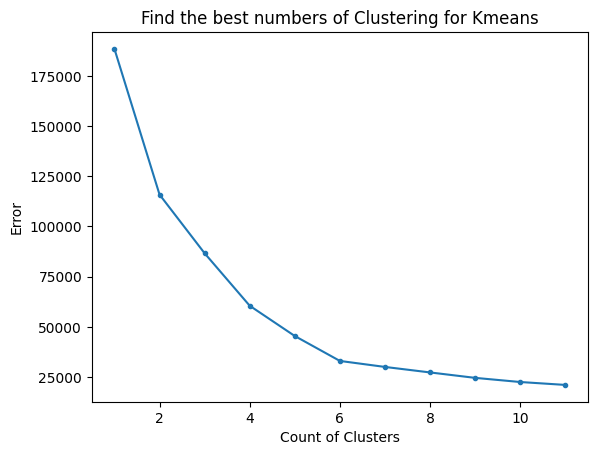

In [37]:
acc_df=get_best_cluster(encoded_data,12)
acc_df

{1: 799.9999999999995,
 2: 587.6049531988835,
 3: 474.92345410257064,
 4: 380.94198678189355,
 5: 322.14706699469343,
 6: 268.97948031058183,
 7: 226.20687296527427,
 8: 187.63348994109455,
 9: 162.68298635498212,
 10: 140.29467357535452,
 11: 125.04300891264467}

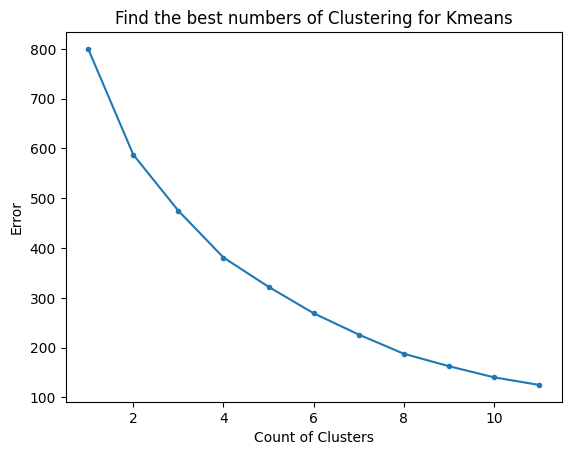

In [38]:
acc_scaled=get_best_cluster(scaled_data,12)
acc_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


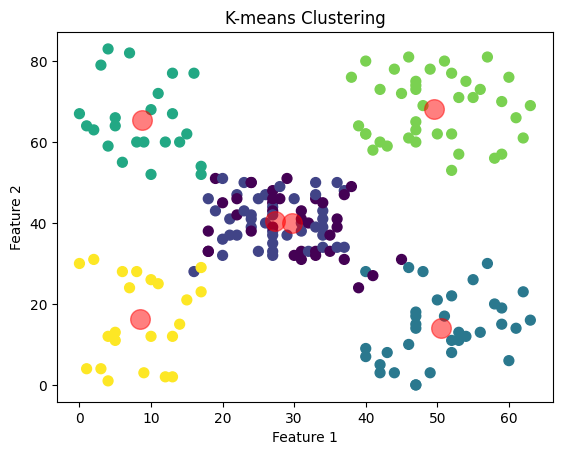

In [55]:
X=encoded_data
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting clusters
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

# Plotting centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


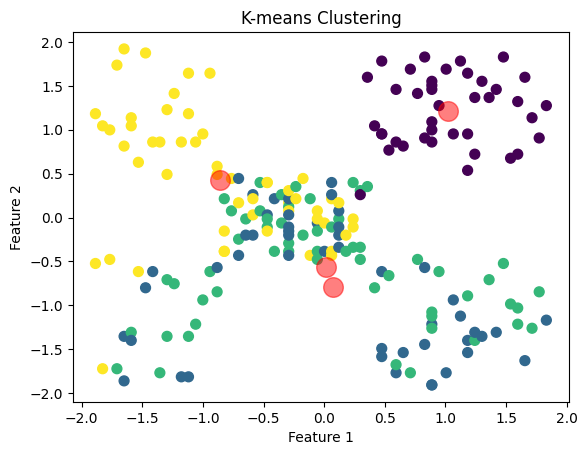

In [56]:
X=scaled_data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting clusters
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')

# Plotting centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()